In [99]:
#BLOCO 1: 
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd

#propriedades do problema
N = 50
minimum_global = -6.5511
F = 0.8
C = 0.7
C1 = 1
C2 = 1
W = 0.7
vmax = 1


---
<h3> Rastrigin Function </h3>

In [100]:
def peaks(x): # objective function
    x = x.T
    F = 3*(1-x[0])**2 * np.exp(-(x[0]**2) - (x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2-x[1]**2) - 1/3*np.exp(-(x[0]+1)**2 - x[1]**2)
    return F

C:\Users\VANDOD~1\AppData\Local\Temp/ipykernel_14436/3990571093.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


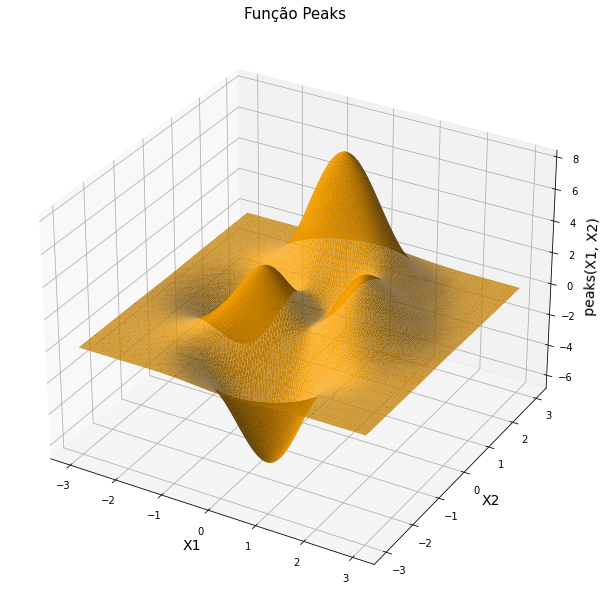

In [101]:
x1 = x2 = np.linspace(-3, 3, 150)
x_p = np.array(list(product(x1,x2)))


font_labels = {'fontsize': 14, 'fontweight': 150}

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.set_title('Função Peaks', fontdict={'fontsize':15})
ax.set_xlabel('X1', fontdict=font_labels)
ax.set_ylabel('X2', fontdict=font_labels)
ax.set_zlabel('peaks(X1, X2)', fontdict=font_labels)
surf = ax.plot_trisurf(x_p[:, 0], x_p[:, 1], [peaks(x_) for x_ in x_p], linewidth=0.1, color='orange')
plt.show()

---
# IMPLEMENTAÇÃO


In [102]:
# BLOCO 2: GERANDO A POPULAÇÃO INICIAL
def initPop(pop, velocidades):

    for c in range(0,N):                                                        # laço para gerar os N indivíduos e suas velocidades
        individuo = []                                                              # lista auxiliar para gerar 1 elemento indivíduo
        velocidade = []                                                             # lista auxiliar para gerar 1 elemento velocidade
        individuo.append(float("{:.4f}".format(rd.uniform(-3,3))))                  # gera a coordenada x1 pro individuo
        individuo.append(float("{:.4f}".format(rd.uniform(-3,3))))                  # gera a coordenada x2 pro individuo
        velocidade.append(float("{:.2f}".format(rd.uniform(-vmax,vmax))))           # gera a velocidade v2 pro individuo
        velocidade.append(float("{:.2f}".format(rd.uniform(-vmax,vmax))))           # gera a velocidade v2 pro individuo
        pop.append(individuo[:])                                                    # adiciona o individuo na população
        velocidades.append(velocidade[:])
        

In [103]:
# BLOCO 3: TESTANDO A FUNÇÃO ACIMA
pop_teste = []
velocidades_teste = []
initPop(pop_teste, velocidades_teste)
print(f'população teste: {pop_teste}\n')
print(f'vetor velocidade: {velocidades_teste}')

população teste: [[-0.7904, -0.7668], [-1.7428, 2.4379], [-1.7066, 0.0068], [-1.7731, 1.63], [-2.2911, -2.8628], [1.508, -2.9201], [2.6994, 0.6932], [0.1942, -0.8134], [-1.6108, 0.221], [2.3598, 0.3345], [-1.8368, 1.2208], [-1.3678, -2.2306], [1.6305, 0.5034], [1.2412, 1.8254], [-1.8787, -0.7912], [1.9888, 0.4342], [-2.3846, 2.2624], [1.8091, -2.6074], [-1.7868, 1.3567], [0.8453, -2.7489], [-0.8359, -1.2089], [2.3084, 2.2442], [-0.2659, 2.4406], [0.9318, 2.1786], [1.5291, 2.6219], [-0.9001, 1.368], [2.4912, -2.5091], [-2.8356, 2.909], [2.9187, 0.9609], [-2.8625, -2.5829], [-2.8227, 2.6622], [-2.969, -2.5988], [-2.5012, -1.2642], [0.3249, -0.1448], [0.0043, 0.5995], [-1.3221, -0.0624], [-0.3847, -1.3441], [2.0951, -0.5423], [-2.5748, 2.3073], [0.551, 2.3346], [1.0704, 1.2853], [2.5248, -0.094], [-0.0237, -1.4753], [-0.6472, 1.3492], [-2.7829, 2.6774], [1.7734, 1.9675], [-2.8802, 0.7283], [-1.3481, 2.5441], [-2.9449, 1.3475], [-0.9251, -0.3919]]

vetor velocidade: [[0.18, 0.46], [0.5, -0

In [104]:
#BLOCO 4: CALCULANDO O F_DE_X DE UM INDIVIDUO
def calcula_f_de_x(individuo):                
    ar = np.array(individuo)                                    #converte a lista individuo para array
    return float("{:.4f}".format(peaks(ar)))                    #calcula o f(x) do individuo apartir da função rastringin

In [105]:
# BLOCO 5: TESTANDO A FUNÇÃO ACIMA
f_de_x_teste = calcula_f_de_x(pop_teste[0])
print(f_de_x_teste)

2.9123


In [106]:
# BLOCO 6: GERANDO LISTA DE POP_FITNESS DA POPULAÇÃO
def popfitness(pop):
    pop_fitness = []                                                                #cria uma lista para armazenar o fitness da população   
    for c in range(0,N):                                                            #laço para analisar os N individuos
        fitness_ind = calcula_f_de_x(pop[c])                                               #calcula o fitness de cada individuo
        pop_fitness.append(fitness_ind)                                                    #coloca o fitness na lista
    return pop_fitness

In [107]:
# BLOCO 7: TESTANDO A FUNÇÃO ACIMA
pop_fitness = popfitness(pop_teste)
print(pop_fitness)

[2.9123, 0.1016, -2.2843, 0.1783, 0.0023, -0.0406, 0.082, -0.1556, -2.6174, 0.4359, -0.272, -0.0438, 2.2055, 1.6783, -0.4138, 1.1942, 0.0091, -0.043, -0.0737, -0.3988, 1.2799, 0.0217, 2.0891, 1.8113, 0.1269, 2.8706, -0.0018, 0.0001, 0.02, 0.0005, 0.0003, 0.0003, -0.0126, 0.2647, 0.68, -2.6797, -1.815, 0.8434, 0.003, 2.2003, 2.754, 0.2686, -5.4259, 4.5862, 0.0004, 0.3115, -0.0391, 0.2617, -0.0069, 0.7351]


In [108]:
#BLOCO 8: CALCULANDO A NOVA POSIÇÃO DO INDIVÍDUO
def movimentacao(individuo, velocidade):
    individuo[0] = individuo[0] + velocidade[0]                 #calcula a posição final do individuo na coordenada x1
    individuo[1] = individuo[1] + velocidade[1]                 #calcula a posição final do individuo na coordenada x2
    for c in range(0,2):                                        #laço para analisar as suas coordenadas do individuo
        if individuo[c] > 3:                                        #confere se houve um extrapolamento positivo da coordenada 
            reflexao = individuo[c] - 3                                 #em caso positivo, calcula a reflexão 
            individuo[c] = 3 - reflexao                                 #aplica a reflexão
        if individuo[c] < -3:                                       #confere se houve um extrapolamento negativo da coordenada
            reflexao = (individuo[c] + 2)                               #em caso positivo, calcula a reflexão
            individuo[c] = -3 - reflexao                                #aplica a reflexão

    

In [109]:
# BLOCO 9: TESTANDO A FUNÇÃO ACIMA

#COM REFLEXÃO:
pos_teste = [1.9, -1.4]
velocidade_teste  = [1, -0.7]
print(f'Posição inicial: {pos_teste} | Velocidade: {velocidade_teste}')
movimentacao(pos_teste, velocidade_teste)
print(f'Posição final: {pos_teste}')
print('-'*20)

#SEM REFLEXAO:
pos_teste = [1, -0.5]
velocidade_teste  = [0.5, -0.7]
print(f'Posição inicial: {pos_teste} | Velocidade: {velocidade_teste}')
movimentacao(pos_teste, velocidade_teste)
print(f'Posição final: {pos_teste}')


Posição inicial: [1.9, -1.4] | Velocidade: [1, -0.7]
Posição final: [2.9, -2.0999999999999996]
--------------------
Posição inicial: [1, -0.5] | Velocidade: [0.5, -0.7]
Posição final: [1.5, -1.2]


In [110]:
#BLOCO 10: ATUALIZANDO O W 
def atualizaW(t):
    w = 0.7 - ((0.7-0.3)/15)*t                              # formula para atualizar o W
    
    if w > 0.7:                                             #se passar do valor maximo, W vira 0.7
        w = 0.7
    
    elif w< 0.3:                                            #se passar do valor minimo, W vira 0.3
        w = 0.3
    
    return w



In [111]:
# BLOCO 11: FUNÇÃO GRÁFICA 
def grafico(pop, t):

    fig, ax = plt.subplots()                                                                                                        #cria o gráfico vázio

    min = [0.228, -1.625]                                                                                                           #define a coordenada que contém o minimo

    curves = ax.tricontour(x_p[:, 0], x_p[:, 1], [peaks(x_) for x_ in x_p])                                                         #plota as curvas de nivel da superficie no gráfico
    plt.scatter(min[0], min[1], color='red', s = 100)                                                                               #plota o minimo no gráfico com a cor vermelha
    for c in range(0,N):                                                                                                            #laço para plotar os 50 individuos
        plt.scatter(pop[c][0],pop[c][1], color='blue')                                                                                  #plota um individuo no gráfico com a cor azul

    plt.xlim((-3,3))                                                                                                                #define os limites da coordenada x1 no gráfico
    plt.ylim((-3,3))                                                                                                                #define os limites da coordenada x2 no gráfico

    ax.set_title(f'Geração {t}', fontdict={'fontsize':15})                                                                          #nomeia o gráfico
    ax.set_xlabel('X1', fontdict=font_labels)                                                                                       #nomeia o eixo x
    ax.set_ylabel('X2', fontdict=font_labels)                                                                                       #nomeia o eixo y
    plt.show()                                                                                                                      #mostra o gráfico


Melhor indivíduo inicial: [-1.0744, 0.1327]; Minímo da população: -2.3735


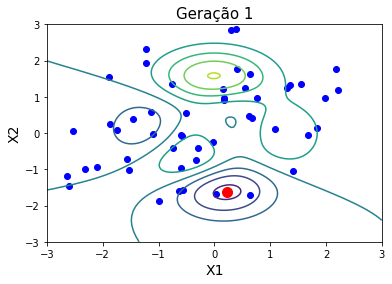

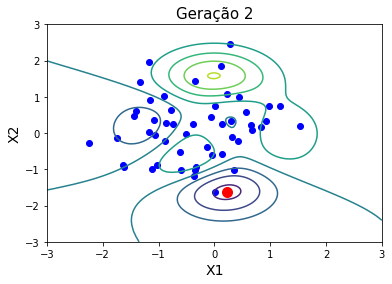

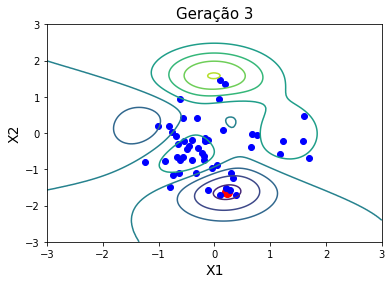

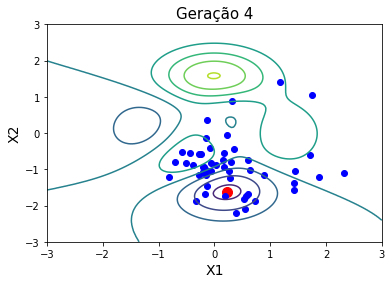

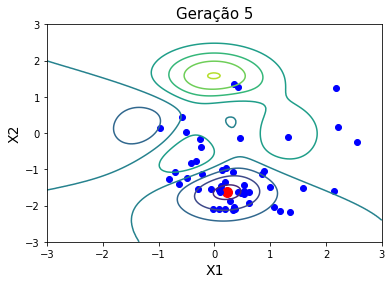

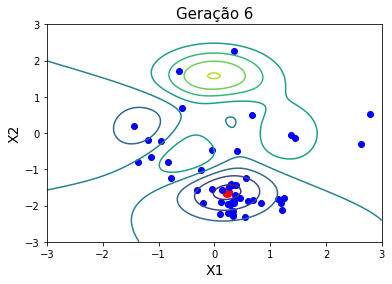

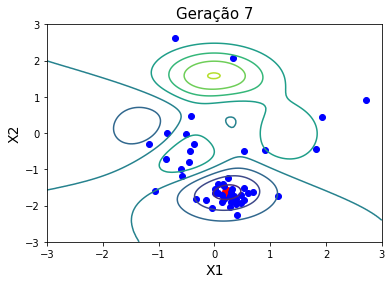

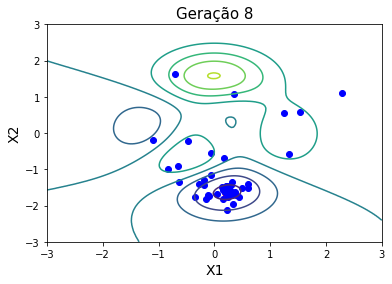

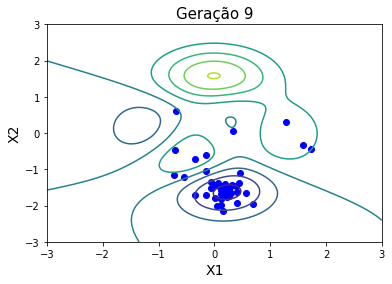

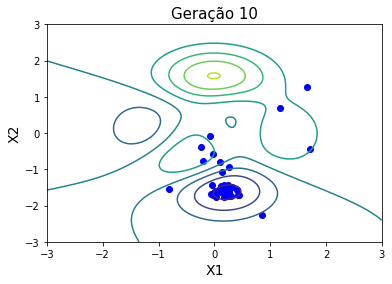

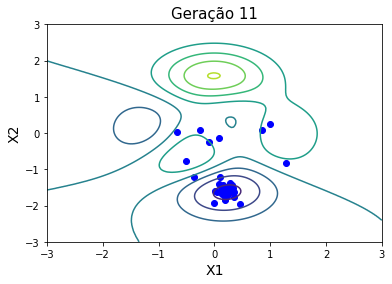

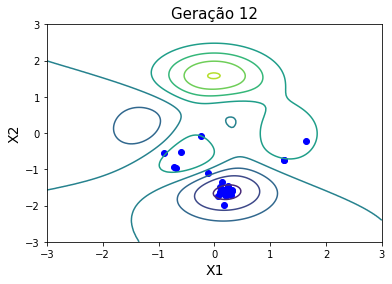

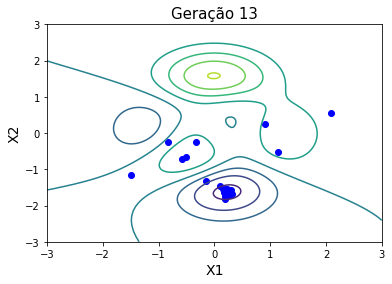

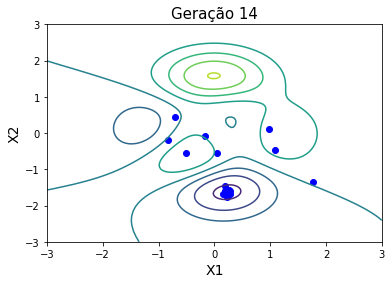

GERAÇAO FINAL:  15
Posição do melhor indivíduo final: [0.23, -1.626]
Minímo da população: -6.5511 

Valor de W ao longo das gerações: [0.7, 0.6733333333333333, 0.6466666666666666, 0.62, 0.5933333333333333, 0.5666666666666667, 0.54, 0.5133333333333333, 0.48666666666666664, 0.45999999999999996, 0.4333333333333333, 0.4066666666666666, 0.38, 0.35333333333333333]


In [112]:
#BLOCO 12: BLOCO PRINCIPAL

## inicialização da população
Ws = []                                                                                                 #lista para armazenar os W ao longo das gerações
pop = []                                                                                                #lista para armazenar a população 
velocidades = []                                                                                        #lista para armazenar as velocidades
pbest = []                                                                                              #lista para armazenar a melhor posição de cada particula
minimos = []                                                                                            #lista para armazenar o melhor f(x) de cada particula
pg = []                                                                                                 #lista para armazenar a melhor posição já encontrada

initPop(pop, velocidades)                                                                               #cria a população e as velocidades iniciais
pop_fitness = popfitness(pop)                                                                           #analisa o fitness da população
best = min(pop_fitness)                                                                                 #descobre o melhor f(x) da população inicial
pos_best = pop_fitness.index(best)                                                                      #descobre a posição do melhor individuo

pbest = pop[:]                                                                                          #preenche 'pbest' na geração inicial
minimos = pop_fitness[:]                                                                                #preenche 'minimos' na geração inicial

pg = (pop[pos_best])                                                                                    #preenche o pg na geração inicial
t = 1                                                                                                   #contador de gerações                          

print(f'Melhor indivíduo inicial: {pg}; Minímo da população: {best}')

while best != minimum_global:                                                                           #laço até encontrar a solução perfeita
                                                                                                 
    for c in range(0,N):                                                                                #laço que percorre todos os indivíduos
        if(calcula_f_de_x(pop[c]) < minimos[c]):                                                            #compara o f(x) de cada individuo da população atual com os da lista minimos
            minimos[c] = calcula_f_de_x(pop[c])                                                                 #caso, o individuo da população atual seja melhor, atualiza minimos
            pbest[c] = pop[c]                                                                                   #também salva a posição dele em pbest
        best = min(minimos)                                                                                 #descobre o melhor f(x) da geração
        pos_best = minimos.index(best)                                                                      #descobre a posição do melhor individuo
        pg = pbest[pos_best]                                                                                #atualiza pg
        
        individuo = []
        individuo.append(pop[c][0])              
        individuo.append(pop[c][1])                                                                         #lista auxiliar para armazenar um individuo da população
        for d in range(0,2):                                                                                #laço para ambas dimensoes do problema
            P1 = rd.random()
            P2 = rd.random()
            t1 = P1*C1
            t2 = P2*C2
            vel = W*velocidades[c][d] + t1*(pbest[c][d] - individuo[d]) + t2*(pg[d] - individuo[d])                 #calcula uma coordenada do vetor velocidade do individuo
            if(vel>vmax):                                                                                           #confere se a velocidade eh maior do que a permitida no problema
                vel = vmax                                                                                                  #altera a velocidade para o valor máximo, caso positivo
            elif(vel<-vmax):                                                                                        #confere se a velocidade eh menor do que a permitida no problema
                vel = -vmax                                                                                                 #altera a velocidade para o valor minimo, caso positivo
            velocidades[c][d] = vel                                                                                 #atualiza uma coordenada do vetor velocidade do individuo
        
        movimentacao(individuo, velocidades[c])                                                                     #movimenta o individuo
        pop[c] = individuo[:]                                                                                       #atualiza a população

    Ws.append(W)                                                                                                    #armazena o valor de W
    W = atualizaW(t)                                                                                                #muda o valor de W para a próxima geração
    grafico(pop, t)
    t = t + 1                                                                                               #incrementa a geração 
    
                                                                                                                                          
#formatando os valores finais                                          
pop[pos_best][0] = float("{:.3f}".format(pop[pos_best][0]))
pop[pos_best][1] = float("{:.3f}".format(pop[pos_best][1]))

print('GERAÇAO FINAL: ', t) 
print(f'Posição do melhor indivíduo final: [{pop[pos_best][0]}, {pop[pos_best][1]}]')
print(f'Minímo da população: {best} \n')
print(f'Valor de W ao longo das gerações: {Ws}')


# **RELATÓRIO EVOLUÇÃO DIFERENCIAL - FUNÇÃO PEAKS**
### Aluno 1: Vando Carlos Diniz Reis - 2019057195 
### Aluno 2: Rafael Moura Marques - 2019089305
---
# *_IMPLEMENTAÇÃO_*: 

### <ins>Criando a População:</ins>
Inicialmente, foi preciso que o algoritmo criasse uma população. Um individuo é representado pela lista `individuo`, esta contendo 2 valores: o primeiro para a coordenada x1 e o segundo para a coordenada x2. Logo, foram gerados 2 números aleatórios entre -3 e 3 para cada indivíduo. No total, 50 indivíduos foram criados e armazenados em uma lista chamada `pop`. Para mais detalhes olhar o <span style="color:green">*[BLOCO 2]*</span>.

### <ins>Função de Aptidão:</ins>
A função de aptidão define a qualidade de uma solução candidata. Neste caso o benefício é a menor distância que o indivíduo está do minimo global do gráfico. Essa distância pode ser calculada através da função `peaks(x)`, sendo que antes de passar o indivíduo para ela é necessário transformá-lo de lista para array, já que a função peaks implementada pelo porfessor trabalha com arrays e nós decidimos representar os indivíduos como lista em nosso código.
O processo foi feito em todos os indivíduos da população e o resultado foi armazenado em uma lista chama `pop_fitness`. Para mais detalhes olhar os <span style="color:green">*[BLOCOS 4 e 6]*</span>.

### <ins>Testes:</ins>

Todas as funções importantes para o funcionamento do programa tem seus testes implementados no bloco subsequente. Olhar os <span style="color:green">*[BLOCOS 3, 5, 7, 9]*</span>.

### <ins>Condição de Parada:</ins>

O algoritmo só termina quando encontra a solução perfeita. A solução perfeita é o minímo global que foi dado no enunciado (-6.5511). Quando o melhor indivíduo da população tiver o f(x) igual a esse valor, o algoritmo termina. Como dito anteriormente, o f(x) é calculado através da função peaks. A cada geração, o algoritmo confere o f(x) do melhor indivíduo. Para mais detalhes olhar o <span style="color:green">*[BLOCOS 8]*</span>.

### <ins>Código Principal:</ins>

Olhar <span style="color:green">*[BLOCO 10]*</span>.

O primeiro `for` que este bloco contém é rodado 100 vezes, uma para cada indivíduo na população, sendo que em cada vez é gerada uma solução mutante que então será parte da população mutante. Esta solução mutante é  feita de forma diferente para cada uma de suas 2 dimensões. Isso pode ser visto no segundo `for`, posto que em cada uma das duas iterações é feito um `if` conferindo se haverá ou não a formação de uma nova soluçã mutante. Em caso positivo, esta é calculada através da fórmula do 'vetor diferença' e das variáveis  `r1`, `r2` e `r3` geradas anteriormente. Em caso negativo, tal dimensão da solução mutante será exatamente o valor que está nessa mesma posição da lista na população atual.  

Já para selecionar a nova população será feito um `if` comparando o fitness da solução mutante em questão e o do indivíduo que estava na população nesta mesma posição, o que tiver o melhor fitness sobreviverá, ou seja, será escolhido para entrar na nova população.

# _*ANÁLISE DOS RESULTADOS*_: 

### <ins>Eficiência:</ins>

Para testarmos o funcionamento e a eficiência da função Peaks, decidimos simular o código 100 vezes para calcular o número médio de gerações que o algoritmo encontrava a solução desejada. No final, a média encontrada foi de 33,51 gerações.

<img src=peaks.jpeg alt="Peaks" width="800"/>

Reparamos também que independente da melhor solução inicial gerada, próxima do minímo global ou não, não houve uma grande variação no número de gerações para obtermos a solução desejada. Acreditamos que isso acontece porque no início do processo de otimazação temos muitos vetores-diferenças disponíveis, logo o algoritmo explora a maioria deles até descobrir os melhores, o que custa algumas gerações. Com o passar das gerações, os possíveis vetores-diferenças acabam ficando mais próximos e uniformes até convergirem para o resultado desejado. 


